In [7]:
#read
#convert ohlc

In [166]:
import numpy as np
import pandas as pd

In [167]:
data= pd.read_csv("dataBITCoin/krakenEUR.csv.gz",header=None, names=["ts","price","volume"],index_col="ts")

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [168]:
data.head()

,price,volume
ts,,
1389173189,624.01000,0.20000
1389173198,624.01000,0.09767
1389173198,623.53836,0.01358
1389173265,623.53836,0.14896
1389173339,623.54066,0.20000


In [169]:
#data=data

In [170]:
data.describe()

,price,volume
count,2.522749e+07,2.522749e+07
mean,4.603733e+03,4.201418e-01
std,3.477302e+03,1.541445e+00
min,1.481712e+02,0.000000e+00
25%,1.404612e+03,1.288000e-02
50%,3.906900e+03,5.949156e-02
75%,6.889300e+03,2.585900e-01
max,2.000000e+04,4.400000e+02


In [171]:
data.shape

(25227493, 2)

In [172]:
#que periodo

In [173]:
#primer periodo
data.index[0]

1389173189

In [174]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  27752.,   34387.,   62918.,   47785.,   61890.,   60653.,
          31978.,   64491.,   61504.,   43065.,   25909.,   35501.,
          46574.,   32894.,   66441.,   29920.,   45794.,   40328.,
          37808.,   35491.,  100677.,   60571.,   60882.,   53097.,
          39460.,   44384.,   34881.,   47659.,   40008.,   51345.,
          44255.,   53826.,   87470.,   48406.,   42752.,   67906.,
         180596.,   91414.,  128411.,   74750.,   58447.,       0.,
              0.,  128477.,   77651.,   96060.,   81742.,  143414.,
         258119.,  175932.,   93490.,  145518.,   73669.,   77507.,
          67304.,   88298.,  129423.,  118806.,  115736.,  256553.,
         171552.,  206438.,  228763.,  466097.,  331810.,  278247.,
         588788.,  801235.,  638777.,  510525.,  576764.,  621319.,
         570370.,  587621.,  336202.,  436948.,  583949.,  513537.,
         748189.,  616753., 1251739., 1433628.,  811690.,  824681.,
         527199.,  574939.,  562189.,  483025., 

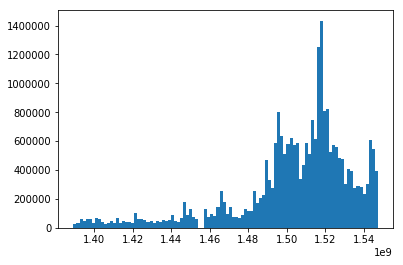

In [175]:
#histograma del indice
plt.hist(data.index,bins=100)

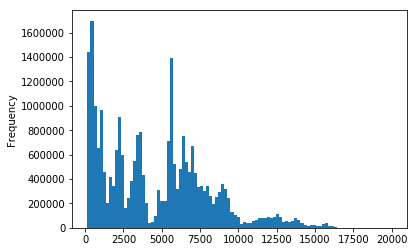

In [176]:
data["price"].plot(kind="hist",bins=100)

In [177]:
sa=data.sample(100000)

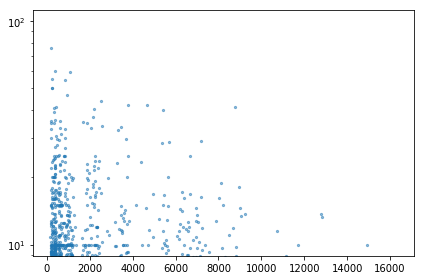

In [178]:
fig,ax=plt.subplots(1,1)
_ = ax.scatter(sa["price"],sa["volume"],alpha=0.5,s=5)
plt.yscale("log")
plt.tight_layout()

In [179]:
data.index[0]

1389173189

In [180]:
data.iloc[0]

price     624.01
volume      0.20
Name: 1389173189, dtype: float64

In [181]:
data.index.min(),data.index.max()

(1389173189, 1547206159)

In [182]:
pd.to_datetime(data.index[0],unit="s"),pd.to_datetime(data.index[-1],unit="s")

(Timestamp('2014-01-08 09:26:29'), Timestamp('2019-01-11 11:29:19'))

In [183]:
#cogemos los últimos 1 millon de transacciones
last_data = data.iloc[-1000000:]

In [184]:
last_data.shape

(1000000, 2)

In [185]:
#convertimos los indices timestamp a datetime
last_data.index = pd.to_datetime(last_data.index,unit="s")

In [186]:
last_data.head()

,price,volume
ts,,
2018-12-03 15:33:11,3396.7,1.130000
2018-12-03 15:33:11,3396.7,0.981000
2018-12-03 15:33:11,3397.0,0.800000
2018-12-03 15:33:11,3397.2,0.029000
2018-12-03 15:33:11,3397.9,0.131179


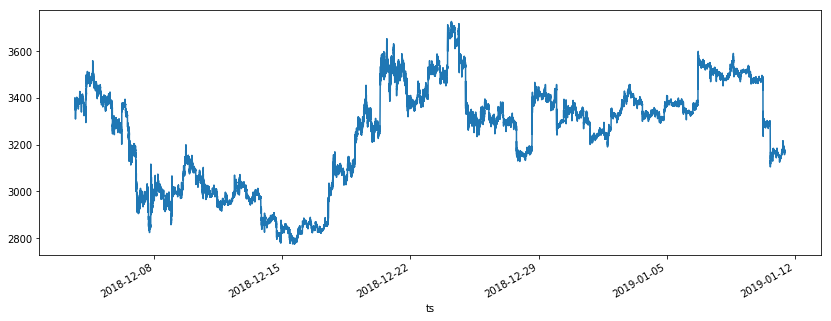

In [187]:
last_data['price'].plot(figsize=(14,5))

In [188]:
last_data["hour"]=last_data.index.hour

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
last_data.head()

,price,volume,hour
ts,,,
2018-12-03 15:33:11,3396.7,1.130000,15
2018-12-03 15:33:11,3396.7,0.981000,15
2018-12-03 15:33:11,3397.0,0.800000,15
2018-12-03 15:33:11,3397.2,0.029000,15
2018-12-03 15:33:11,3397.9,0.131179,15


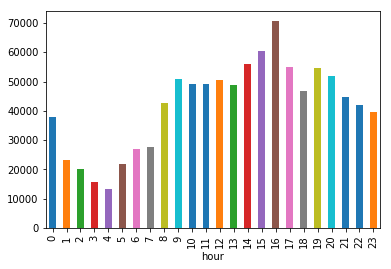

In [190]:
last_data.groupby("hour").count()["price"].plot(kind="bar")

In [191]:
last_data

,price,volume,hour
ts,,,
2018-12-03 15:33:11,3396.7,1.130000,15
2018-12-03 15:33:11,3396.7,0.981000,15
2018-12-03 15:33:11,3397.0,0.800000,15
2018-12-03 15:33:11,3397.2,0.029000,15
2018-12-03 15:33:11,3397.9,0.131179,15
2018-12-03 15:33:11,3399.2,4.467500,15
2018-12-03 15:33:11,3399.2,1.032500,15
2018-12-03 15:33:11,3400.0,0.100000,15
2018-12-03 15:33:12,3400.0,0.100000,15


In [192]:

#resample is like groupby and agg done aggregation operations needed, 'first' and 'last' is especial operation 
#also que can do max min and custom operations
mdata= last_data.resample("1h").agg(
    {'price' : ['first',max,min,'last'],
      'volume': sum
    }    
)

In [193]:
mdata

price                               volume
                      first     max     min    last          sum
ts                                                              
2018-12-03 15:00:00  3396.7  3400.1  3354.7  3387.8   411.870300
2018-12-03 16:00:00  3387.8  3397.4  3310.2  3375.9   651.082013
2018-12-03 17:00:00  3375.8  3397.2  3362.1  3384.2   432.904973
2018-12-03 18:00:00  3387.7  3403.7  3370.7  3391.0   833.789759
2018-12-03 19:00:00  3389.3  3393.8  3370.0  3373.3   342.018550
2018-12-03 20:00:00  3371.9  3390.0  3353.0  3390.0   359.691724
2018-12-03 21:00:00  3387.0  3421.5  3381.8  3420.1   369.278113
2018-12-03 22:00:00  3420.6  3428.3  3387.7  3394.9   130.852100
2018-12-03 23:00:00  3396.3  3410.9  3376.0  3383.7   173.571187
2018-12-04 00:00:00  3379.3  3412.8  3340.1  3400.0   193.233066
2018-12-04 01:00:00  3398.4  3417.5  3392.1  3402.8   116.919422
2018-12-04 02:00:00  3402.9  3405.0  3377.1  3377.3    37.248196
2018-12-04 03:00:00  3381.3  3383.5  3324.7  3357.9   320.978934
2018-12-04 04:00:00  3358.9  3370.8  3345.4  3354.8    51.061978
2018-12-04 05:00:00  3358.0  3366.9  3319.3  3325.0   236.583502
2018-12-04 06:00:00  3324.4  3500.0  3295.2  3468.0  1039.344227
2018-12-04 07:00:00  3468.0  3499.0  3460.5  3499.0   256.322277
2018-12-04 08:00:00  3499.0  3514.0  3476.0  3483.8   288.036897
2018-12-04 09:00:00  3483.7  3506.4  3482.4  3484.4   315.966207
2018-12-04 10:00:00  3484.4  3510.1  3460.0  3465.1   278.145294
2018-12-04 11:00:00  3465.4  3484.9  3450.3  3479.3   334.688726
2018-12-04 12:00:00  3479.3  3484.8  3463.2  3468.6   170.904667
2018-12-04 13:00:00  3468.6  3494.8  3462.2  3477.8   185.374227
2018-12-04 14:00:00  3477.9  3513.7  3477.7  3511.0   372.038573
2018-12-04 15:00:00  3513.3  3559.9  3492.3  3501.0   515.370802
2018-12-04 16:00:00  3501.6  3507.6  3455.6  3480.6   312.431702
2018-12-04 17:00:00  3478.2  3480.6  3442.0  3453.8   272.519274
2018-12-04 18:00:00  3453.0  3464.0  3431.0  3455.8   344.937683
2018-12-04 19:00:00  3455.8  3470.6  3450.0  3451.2   297.314356
2018-12-04 20:00:00  3452.0  3453.1  3397.4  3412.6   335.339024
...                     ...     ...     ...     ...          ...
2019-01-10 06:00:00  3490.3  3492.3  3236.0  3312.5  1763.783505
2019-01-10 07:00:00  3307.7  3311.3  3281.2  3305.7   628.462078
2019-01-10 08:00:00  3305.7  3308.0  3282.7  3289.9   812.579935
2019-01-10 09:00:00  3289.8  3296.5  3272.5  3284.4   833.166413
2019-01-10 10:00:00  3286.3  3297.9  3284.4  3286.5   455.819841
2019-01-10 11:00:00  3287.6  3297.2  3281.9  3296.6   294.895931
2019-01-10 12:00:00  3296.6  3303.7  3282.7  3291.6   396.653934
2019-01-10 13:00:00  3288.3  3298.0  3269.7  3289.1   531.839501
2019-01-10 14:00:00  3286.9  3298.0  3279.5  3295.6   419.800737
2019-01-10 15:00:00  3295.6  3302.8  3291.0  3294.2   290.104254
2019-01-10 16:00:00  3294.2  3295.4  3105.2  3159.2  1838.204243
2019-01-10 17:00:00  3159.2  3162.7  3142.0  3152.5   531.434191
2019-01-10 18:00:00  3152.5  3152.9  3139.8  3149.2   363.584935
2019-01-10 19:00:00  3149.2  3181.7  3130.0  3176.0   545.468346
2019-01-10 20:00:00  3176.0  3185.0  3166.7  3168.9   278.543983
2019-01-10 21:00:00  3168.9  3173.0  3163.8  3171.9    82.638754
2019-01-10 22:00:00  3171.9  3172.3  3160.6  3169.1   118.813728
2019-01-10 23:00:00  3166.8  3172.2  3162.7  3162.7    48.318162
2019-01-11 00:00:00  3162.7  3185.5  3144.1  3173.5   242.704102
2019-01-11 01:00:00  3176.0  3177.5  3160.4  3162.4    67.613129
2019-01-11 02:00:00  3162.4  3166.5  3150.3  3151.7    97.267302
2019-01-11 03:00:00  3151.1  3155.7  3149.7  3154.0   106.366101
2019-01-11 04:00:00  3153.8  3153.8  3125.6  3138.7    95.813542
2019-01-11 05:00:00  3138.7  3154.0  3138.6  3152.6    90.830170
2019-01-11 06:00:00  3149.5  3163.2  3148.2  3161.1   149.917815
2019-01-11 07:00:00  3161.1  3178.2  3157.6  3174.3   326.359000
2019-01-11 08:00:00  3174.3  3217.6  3174.3  3183.0   498.701336
2019-01-11 09:00:00  3183.1  3199.3  3180.0  3183.4   455

In [194]:
mdata.columns

MultiIndex(levels=[['price', 'volume'], ['first', 'last', 'max', 'min', 'sum']],
           labels=[[0, 0, 0, 0, 1], [0, 2, 3, 1, 4]])

In [195]:
#eliminamos el primer nivel price volume no sirve
mdata.columns=mdata.columns.droplevel(0)

In [196]:
mdata.head()

,first,max,min,last,sum
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


In [197]:
#renombramos columnas
mdata.rename(columns={'first':'open','max':'high','min':'low','last':'close','sum':'volume'},inplace=True)

In [198]:
mdata.head()

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


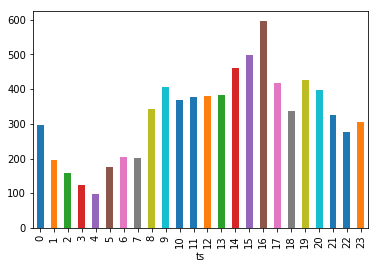

In [199]:
#el volumen medio por hora
mdata.groupby(mdata.index.hour).mean()['volume'].plot(kind="bar")

In [200]:
mdata.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25227493 entries, 1389173189 to 1547206159
Data columns (total 2 columns):
price     float64
volume    float64
dtypes: float64(2)
memory usage: 577.4 MB


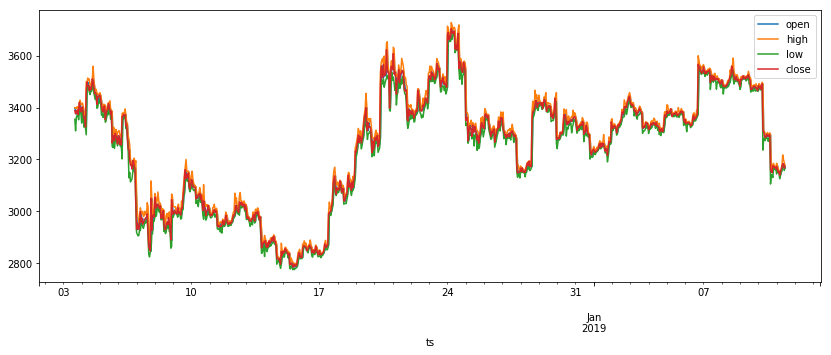

In [202]:
mdata.drop('volume',axis=1).plot(figsize=(14,5))

In [203]:
!pip install mpl_finance
from mpl_finance import  candlestick2_ohlc


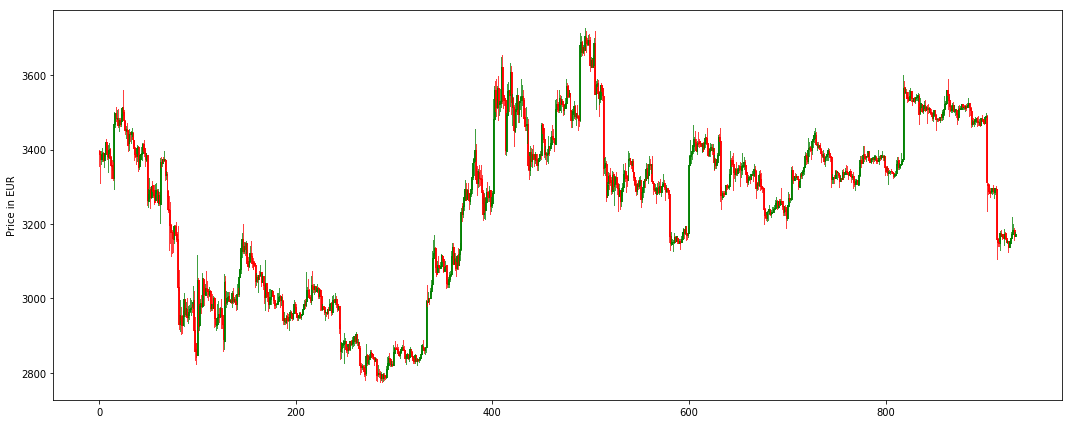

In [204]:
aux=mdata
fig,ax=plt.subplots(1,1,figsize=(15,6))
candlestick2_ohlc(ax,aux["open"],aux["high"],aux["low"],aux["close"],colorup='g',width=1)
ax.set_ylabel("Price in EUR")
plt.tight_layout()

In [205]:
X=np.arange(-1,1,0.005)
y=2*X**2+np.random.normal(.2,np.abs(X))

[]

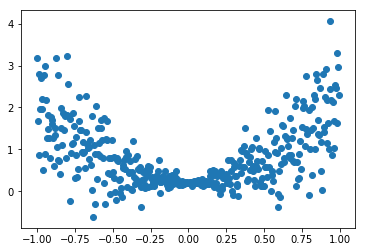

In [206]:
fig,ax=plt.subplots(1,1)
ax.scatter(X,y)
plt.plot()

In [207]:
df=pd.DataFrame({'y':y})

In [208]:
df.head()

,y
0,3.178254
1,1.686805
2,2.808744
3,0.873533
4,1.965623


In [209]:
for i in [2,5,10,20,50,100]:    
    df["moving_avg_{}".format(i)]=df['y'].rolling(window=i).mean()

In [210]:
df["moving_avg_{}".format('dif')]=df['y'].rolling(window=10).mean()/df['y'].rolling(window=25).mean()
df

,y,moving_avg_2,moving_avg_5,moving_avg_10,moving_avg_20,moving_avg_50,moving_avg_100,moving_avg_dif
0,3.178254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.686805,2.432529,NaN,NaN,NaN,NaN,NaN,NaN
2,2.808744,2.247774,NaN,NaN,NaN,NaN,NaN,NaN
3,0.873533,1.841138,NaN,NaN,NaN,NaN,NaN,NaN
4,1.965623,1.419578,2.102592,NaN,NaN,NaN,NaN,NaN
5,2.705006,2.335315,2.007942,NaN,NaN,NaN,NaN,NaN
6,1.963500,2.334253,2.063281,NaN,NaN,NaN,NaN,NaN
7,2.201209,2.082354,1.941774,NaN,NaN,NaN,NaN,NaN
8,0.511860,1.356535,1.869440,NaN,NaN,NaN,NaN,NaN
9,2.772343,1.642102,2.030784,2.066688,NaN,NaN,NaN,NaN


/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[]

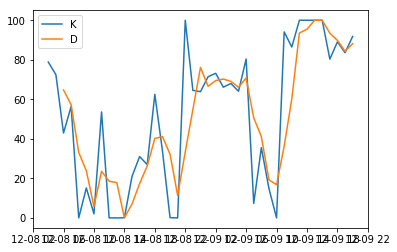

In [227]:
#%K=100*(Price-L5)/(H5-L5)}
#%D=((K1+K2+K3)/3)}
#Stockastic
def stock(df,period,period_d):    
    df["K"]=100*((df['close']-df['close'].rolling(window=period).min())/(df['close'].rolling(window=period).max()-df['close'].rolling(window=period).min()))
    df["D"]=df['K'].rolling(period_d).mean()
    return df

xstock=stock(mdata[100:150],10,3)
xstock

fig,ax=plt.subplots(1,1)
ax.plot(xstock["K"])
ax.plot(xstock["D"])
plt.legend()
plt.plot()



mdata

[]

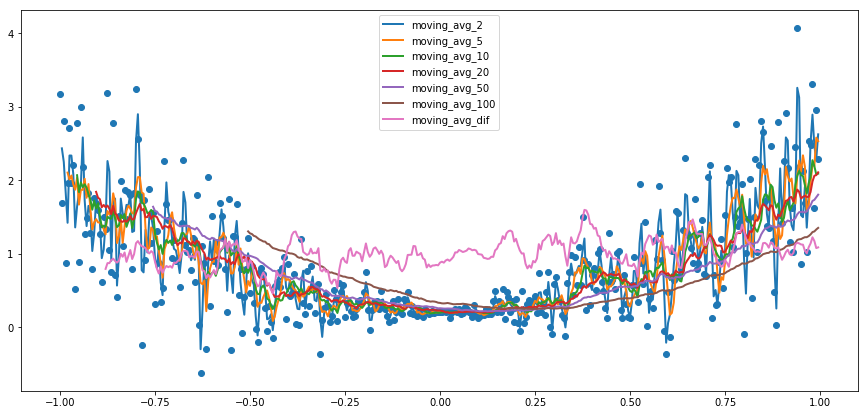

In [212]:
fig,ax=plt.subplots(1,1,figsize=(15,7))
ax.scatter(X,y)
for col in df.columns:
    if col.startswith('moving_avg_'):
        ax.plot(X,df[col],lw=2,label=col)
plt.legend()    
plt.plot()

In [213]:
mdata

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550
2018-12-03 20:00:00,3371.9,3390.0,3353.0,3390.0,359.691724
2018-12-03 21:00:00,3387.0,3421.5,3381.8,3420.1,369.278113
2018-12-03 22:00:00,3420.6,3428.3,3387.7,3394.9,130.852100
2018-12-03 23:00:00,3396.3,3410.9,3376.0,3383.7,173.571187


In [214]:
for window in (1,3,5,10,30,60,120,180,240,300,480,600):
    mdata['ma{}'.format(window)]=mdata['close'].rolling(window).mean()

In [215]:
mdata

,open,high,low,close,volume,ma1,ma3,ma5,ma10,ma30,ma60,ma120,ma180,ma240,ma300,ma480,ma600
ts,,,,,,,,,,,,,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300,3387.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013,3375.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973,3384.2,3382.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759,3391.0,3383.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550,3373.3,3382.833333,3382.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 20:00:00,3371.9,3390.0,3353.0,3390.0,359.691724,3390.0,3384.766667,3382.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 21:00:00,3387.0,3421.5,3381.8,3420.1,369.278113,3420.1,3394.466667,3391.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 22:00:00,3420.6,3428.3,3387.7,3394.9,130.852100,3394.9,3401.666667,3393.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 23:00:00,3396.3,3410.9,3376.0,3383.7,173.571187,3383.7,3399.566667,3392.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
ma_cols=[x for x in mdata.columns if x.startswith('ma')]

In [217]:
ma_cols

['ma1',
 'ma3',
 'ma5',
 'ma10',
 'ma30',
 'ma60',
 'ma120',
 'ma180',
 'ma240',
 'ma300',
 'ma480',
 'ma600']

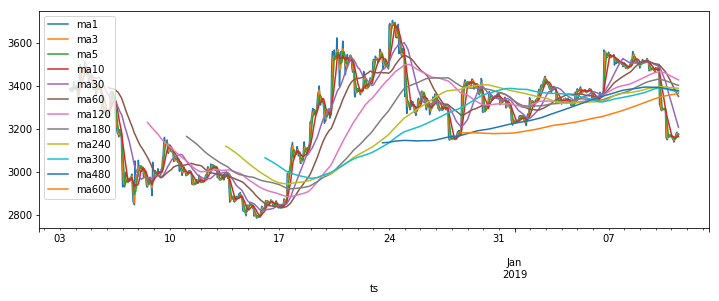

In [218]:
fig,ax=plt.subplots(figsize=(12,4))
for col in ma_cols:
   mdata[col].plot(ax=ax,label=col)

plt.legend()
plt.show()

In [220]:
seriea=mdata['ma1']>=mdata['ma10']
serieb=mdata['ma1']<mdata['ma10']
seriea,serieb

(ts
 2018-12-03 15:00:00    False
 2018-12-03 16:00:00    False
 2018-12-03 17:00:00    False
 2018-12-03 18:00:00    False
 2018-12-03 19:00:00    False
 2018-12-03 20:00:00    False
 2018-12-03 21:00:00    False
 2018-12-03 22:00:00    False
 2018-12-03 23:00:00    False
 2018-12-04 00:00:00     True
 2018-12-04 01:00:00     True
 2018-12-04 02:00:00    False
 2018-12-04 03:00:00    False
 2018-12-04 04:00:00    False
 2018-12-04 05:00:00    False
 2018-12-04 06:00:00     True
 2018-12-04 07:00:00     True
 2018-12-04 08:00:00     True
 2018-12-04 09:00:00     True
 2018-12-04 10:00:00     True
 2018-12-04 11:00:00     True
 2018-12-04 12:00:00     True
 2018-12-04 13:00:00     True
 2018-12-04 14:00:00     True
 2018-12-04 15:00:00     True
 2018-12-04 16:00:00    False
 2018-12-04 17:00:00    False
 2018-12-04 18:00:00    False
 2018-12-04 19:00:00    False
 2018-12-04 20:00:00    False
                        ...  
 2019-01-10 06:00:00    False
 2019-01-10 07:00:00    False
 2019-

In [222]:
df = pd.DataFrame({'b':serieb,'nb':serieb.shift(-1)},index=serieb.index)

In [235]:
df["signal"] = df['b']!=df["nb"]
df["buy_signal"] = df["signal"] & df["b"]
df["sell_signal"] = df["signal"] & df["nb"]
df

,b,nb,signal,buy_signal,sell_signal
ts,,,,,
2018-12-03 15:00:00,False,False,False,False,False
2018-12-03 16:00:00,False,False,False,False,False
2018-12-03 17:00:00,False,False,False,False,False
2018-12-03 18:00:00,False,False,False,False,False
2018-12-03 19:00:00,False,False,False,False,False
2018-12-03 20:00:00,False,False,False,False,False
2018-12-03 21:00:00,False,False,False,False,False
2018-12-03 22:00:00,False,False,False,False,False
2018-12-03 23:00:00,False,False,False,False,False
